# 🌐 Spatio-Temporal Data Analysis: Uber Pickups in New York City 🚖
Spatio-temporal data pertains to both space (geographical coordinates) and time. The Uber Pickups dataset provides data about Uber rides in New York City, detailing the time and location of pickups.

# 📚 Libraries:
Start by importing the essential libraries for data manipulation, visualization, and spatio-temporal analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime


# 📦 Loading the Dataset:
To demonstrate, we will use a subset of the Uber dataset for a specific month. The entire dataset is much larger and is divided into several files based on months.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv"
df_uber = pd.read_csv(url, parse_dates=['Date/Time'])
df_uber.head()


,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


# 🕵️‍♂️ Exploratory Data Analysis (EDA) & 🎨 Visualization:
📈 Basic Data Overview:
Understanding the structure, columns, and types of data present.

In [3]:
df_uber.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [9]:
df_uber.shape

(564516, 8)

In [10]:
df_uber.describe()

,Lat,Lon,Hour,Day,Weekday,Month
count,564516.000000,564516.000000,564516.000000,564516.000000,564516.00000,564516.0
mean,40.740005,-73.976817,14.465043,16.117127,2.86698,4.0
std,0.036083,0.050426,5.873925,9.048139,1.82081,0.0
min,40.072900,-74.773300,0.000000,1.000000,0.00000,4.0
25%,40.722500,-73.997700,10.000000,8.000000,1.00000,4.0
50%,40.742500,-73.984800,16.000000,16.000000,3.00000,4.0
75%,40.760700,-73.970000,19.000000,24.000000,4.00000,4.0
max,42.116600,-72.066600,23.000000,30.000000,6.00000,4.0


# 🧹 Data Preprocessing:
1️⃣ Handling Missing Values:
Ensure that there are no missing values in our dataset.

In [11]:
df_uber.dropna(inplace=True)

# 2️⃣ Extracting Time Features:
For spatio-temporal analysis, extracting various time-related features can be beneficial.

In [12]:
df_uber['Day'] = df_uber['Date/Time'].apply(lambda x: x.day)
df_uber['Weekday'] = df_uber['Date/Time'].apply(lambda x: x.weekday())
df_uber['Month'] = df_uber['Date/Time'].apply(lambda x: x.month)

print(df_uber['Day'])
print(df_uber['Weekday'])
print(df_uber['Month'])

0          1
1          1
2          1
3          1
4          1
          ..
564511    30
564512    30
564513    30
564514    30
564515    30
Name: Day, Length: 564516, dtype: int64
0         1
1         1
2         1
3         1
4         1
         ..
564511    2
564512    2
564513    2
564514    2
564515    2
Name: Weekday, Length: 564516, dtype: int64
0         4
1         4
2         4
3         4
4         4
         ..
564511    4
564512    4
564513    4
564514    4
564515    4
Name: Month, Length: 564516, dtype: int64


# 🗺️ Plotting Pickups on a Map:
Visualize Uber pickups on a map to understand the spatial distribution.

In [4]:
# Create a base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Sample a subset for visualization
subset = df_uber.sample(1000)

for _, row in subset.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m

# 📅 Time-based Analysis:
Understand the distribution of Uber pickups over different times of the day or days of the week.

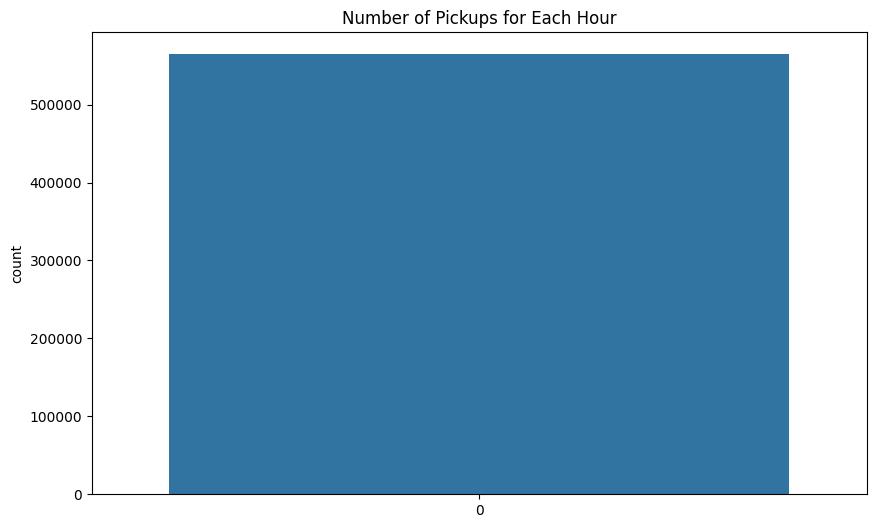

In [5]:
# Extracting hour from the 'Date/Time' column
df_uber['Hour'] = df_uber['Date/Time'].apply(lambda x: x.hour)

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(df_uber['Hour'])
plt.title('Number of Pickups for Each Hour')
plt.show()


The Uber Pickups dataset provides a rich source of spatio-temporal data. The steps above are a starting point for understanding the spatial distribution and temporal trends of Uber pickups in New York City. For further analysis, one can look into patterns based on weekdays vs. weekends, clustering of pickup locations, or even predicting future pickups based on historical data.